In [138]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

def f(x,test,m) :
    if test==1:
        return (m**2)*np.sin(m*x)
    elif test==2 :
        return (m**2)*np.cos(m*x)
    
def ue_npen(x,test,m,c):
    if test==1 :
        return np.sin(m*x)
    elif test==2 :

        return np.cos(m*x)+c



def ue_pen_dir(x,eta,m) :
    k=((1/np.pi)*np.exp(-np.pi/np.sqrt(eta)))-((1/np.pi)*np.exp(-2*np.pi/np.sqrt(eta)))+((1/np.sqrt(eta))*np.exp(-2*np.pi/np.sqrt(eta)))
    k_p=((1/np.pi)*np.exp(np.pi/np.sqrt(eta)))-((1/np.pi)*np.exp(2*np.pi/np.sqrt(eta)))-((1/np.sqrt(eta))*np.exp(2*np.pi/np.sqrt(eta)))
    k1=((1/np.pi)*np.exp(-np.pi/np.sqrt(eta)))-((1/np.pi)*np.exp(-2*np.pi/np.sqrt(eta)))+((1/np.sqrt(eta))*np.exp(-np.pi/np.sqrt(eta)))
    k1_p=((1/np.pi)*np.exp(np.pi/np.sqrt(eta)))-((1/np.pi)*np.exp(2*np.pi/np.sqrt(eta)))-((1/np.sqrt(eta))*np.exp(np.pi/np.sqrt(eta)))
    B2_d=(-k*m*((-1)**m)-k1*m)/((1+eta*m**2)*(k_p*k1-k*k1_p))
    B1_d=(1/k)*(-m/(1+eta*m**2)-B2_d*k_p)
    A1_d=B1_d*((1/np.pi*np.exp(-np.pi/np.sqrt(eta)))-(1/np.pi*np.exp(-2*np.pi/np.sqrt(eta))))+B2_d*((1/np.pi*np.exp(np.pi/np.sqrt(eta)))-(1/np.pi*np.exp(2*np.pi/np.sqrt(eta))))
    A2_d=B1_d*np.exp(-2*np.pi/np.sqrt(eta))+B2_d*np.exp(2*np.pi/np.sqrt(eta))
    
    
    if 0 < x and x < np.pi:
        return np.sin(m*x)+(A1_d*x)+A2_d
    if np.pi < x and x < 2*np.pi:
        return (m**2*eta/(1+eta*m**2))*np.sin(m*x)+B1_d*np.exp((-x)/np.sqrt(eta))+B2_d*np.exp((x)/np.sqrt(eta))
    
    
    


def ue_pen_neu(x,eta,m) :
    B1_n=(1-(-1)**m)/((1+eta)*np.pi)
    A1_n=eta*B1_n
    B2_n=(3*np.pi/2)*((((-1)**m)-1)/(1+eta))*((eta/2)+2)+1
    A2_n=2*np.pi*B1_n+B2_n-1

    
    if 0 < x and x < np.pi:
        return np.cos(m*x)+A1_n*x+A2_n
    if np.pi < x and x < 2*np.pi:
        return B1_n*x+B2_n

ue_pen_dir(1,0.01,2) 

1.1016051191333829

No handles with labels found to put in legend.


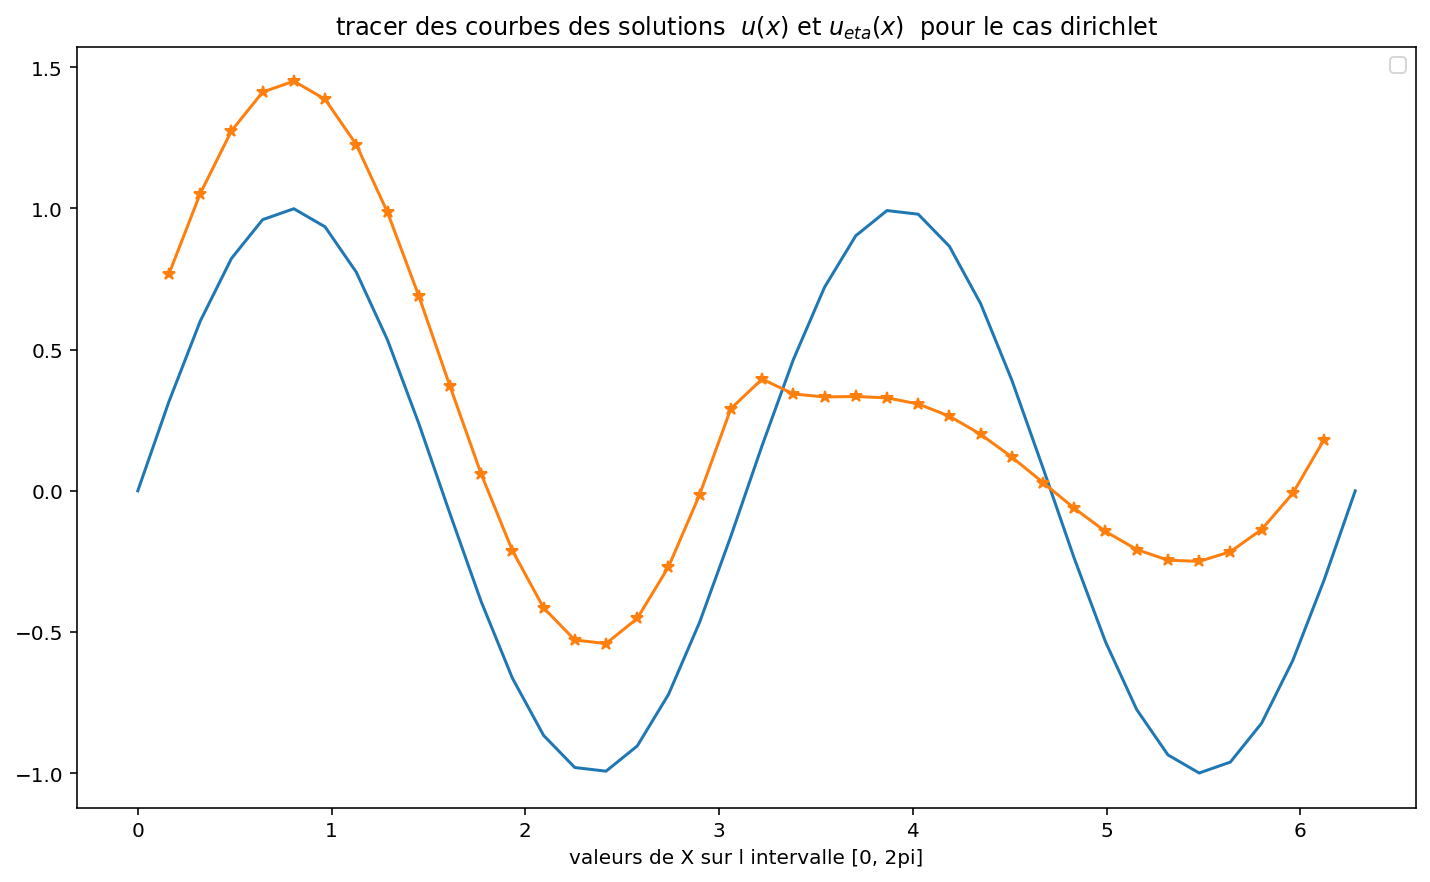

In [34]:
X=np.linspace(0,2*np.pi,40)
plt.plot(X,ue_npen(X,1,2,0))
l=[]
for x in X :
    l.append(ue_pen_dir(x,0.1,2))
    
plt.plot(X,l,'-*')
plt.xlabel('valeurs de X sur l intervalle [0, 2pi]')
plt.legend(loc = 'upper right')
plt.title(r'tracer des courbes des solutions  $u(x)$ et $u_{eta}(x)$  pour le cas dirichlet')
plt.show()

No handles with labels found to put in legend.


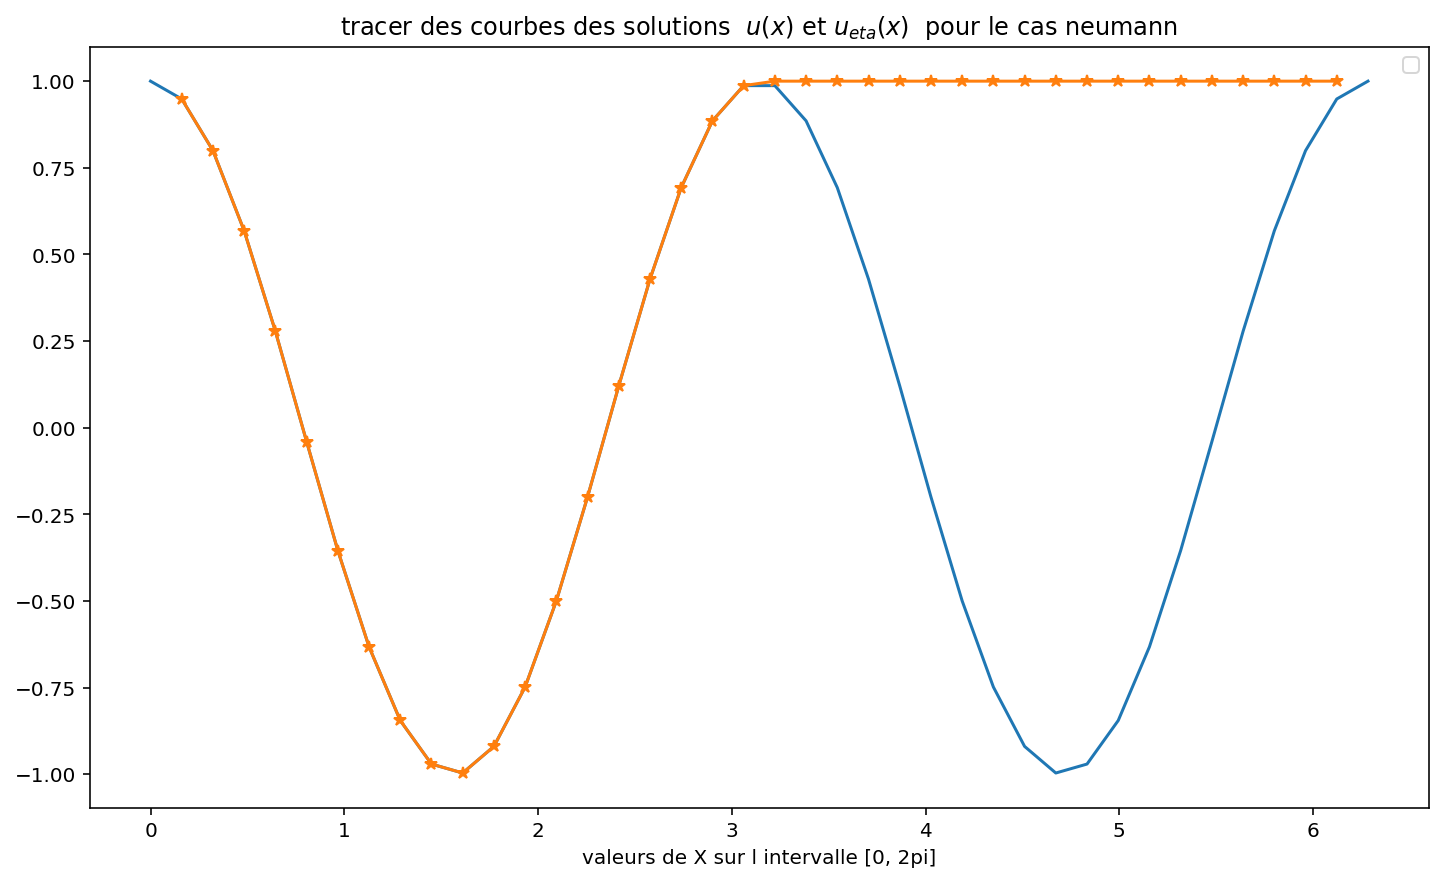

In [37]:
X=np.linspace(0,2*np.pi,40)
plt.plot(X,ue_npen(X,2,2,0))
l=[]
for x in X :
    l.append(ue_pen_neu(x,0.1,2))
    
plt.plot(X,l,'-*')
plt.xlabel('valeurs de X sur l intervalle [0, 2pi]')
plt.legend(loc = 'upper right')
plt.title(r'tracer des courbes des solutions  $u(x)$ et $u_{eta}(x)$  pour le cas neumann')
plt.show()

/ext/anaconda2020.02/lib/python3.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: overflow encountered in exp
/ext/anaconda2020.02/lib/python3.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in double_scalars
/ext/anaconda2020.02/lib/python3.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: overflow encountered in exp
/ext/anaconda2020.02/lib/python3.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in double_scalars
/ext/anaconda2020.02/lib/python3.7/site-packages/ipykernel/__main__.py:25: RuntimeWarning: divide by zero encountered in double_scalars
/ext/anaconda2020.02/lib/python3.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: overflow encountered in exp
/ext/anaconda2020.02/lib/python3.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in double_scalars
/ext/anaconda2020.02/lib/python3.7/site-packages/ipykernel/__main__.py:27: RuntimeWarning: overflow en

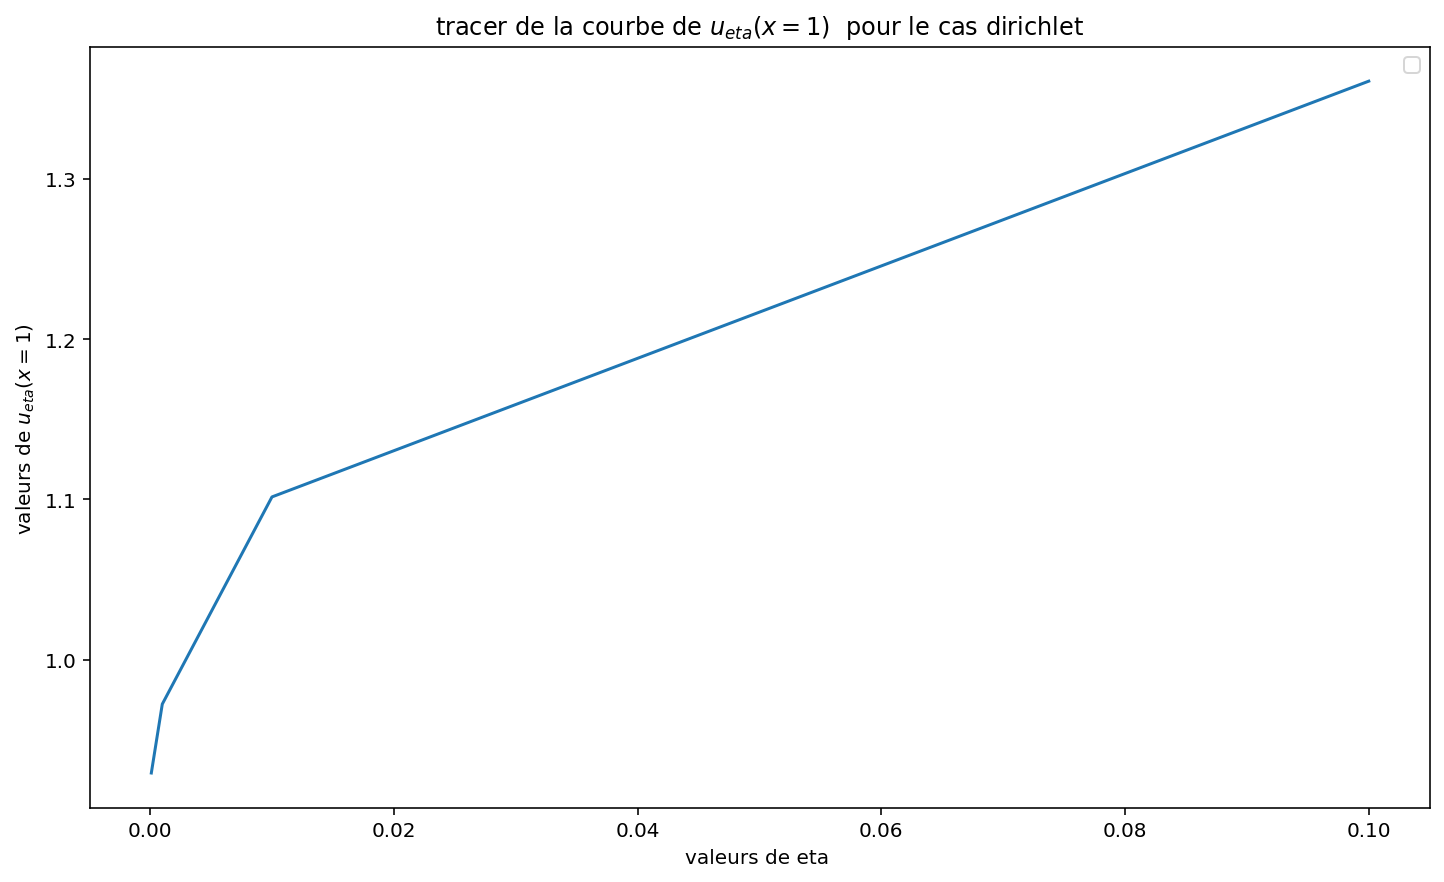

In [49]:
X=np.linspace(0,2*np.pi,40)
l_eta=[0.000001,0.00001,0.0001,0.001,0.01,0.1]
p=[]
for eta in l_eta :
    p.append(ue_pen_dir(1,eta,2))
plt.plot(l_eta,p)
plt.xlabel('valeurs de eta ')
plt.ylabel('valeurs de $u_{eta}(x=1)$ ')
plt.legend(loc = 'upper right')
plt.title(r'tracer de la courbe de $u_{eta}(x=1)$  pour le cas dirichlet')
plt.show()

On constate que plus la valeur de eta est grande, plus $u_{eta}(x=1)$ l'est aussi.

No handles with labels found to put in legend.


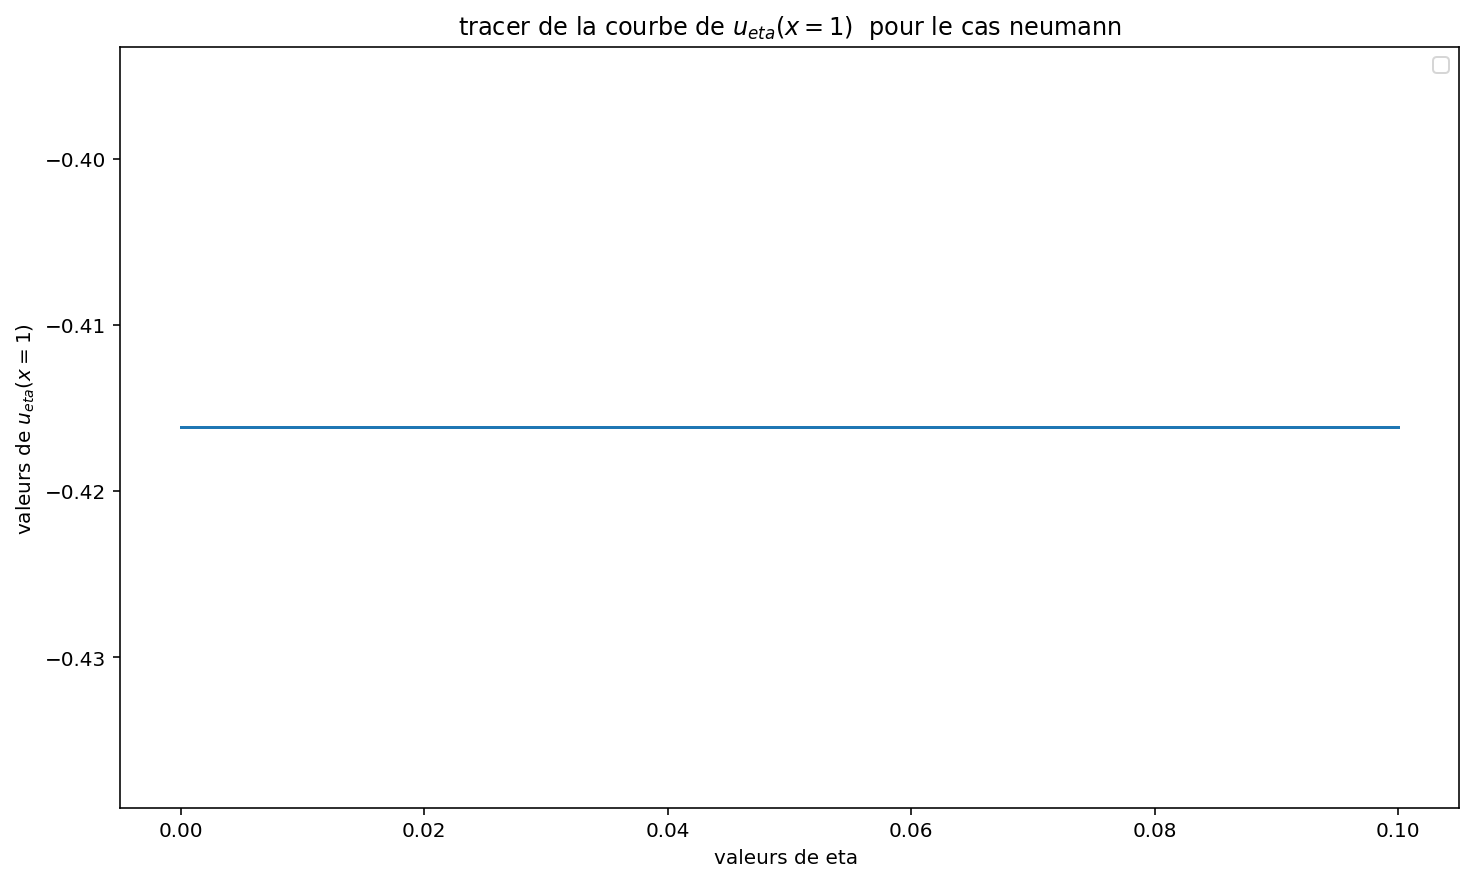

In [52]:
X=np.linspace(0,2*np.pi,40)
l_eta=[0.000001,0.00001,0.0001,0.001,0.01,0.1]
p=[]
for eta in l_eta :
    p.append(ue_pen_neu(1,eta,2))
plt.plot(l_eta,p)
plt.xlabel('valeurs de eta ')
plt.ylabel('valeurs de $u_{eta}(x=1)$ ')
plt.legend(loc = 'upper right')
plt.title(r'tracer de la courbe de $u_{eta}(x=1)$  pour le cas neumann')
plt.show()

On constate que pour différentes valeurs de eta, la solution $u_{eta}(x=1)$ reste constante.

In [135]:
X=np.linspace(0.1,2*3.14,40)
def difference_u_et_ueta(test,m,c,eta):
    U=(X,test,m,c)
    lv=[]
    for x in X :
        lv.append(ue_pen_dir(x,eta,m))
        V=np.array(lv)
    return abs(list(U)[0] - V)

difference_u_et_ueta(1,2,0,0.1)

array([0.55046708, 0.68754378, 0.77539625, 0.78949102, 0.71264108,
       0.53671772, 0.26346017, 0.0956976 , 0.52076578, 0.98518972,
       1.45849484, 1.90932198, 2.30855084, 2.63220041, 2.86381759,
       2.9961159 , 3.03170126, 2.98281242, 2.87010197, 2.72057929,
       2.89531353, 3.09011672, 3.25344255, 3.41044491, 3.57678943,
       3.76107252, 3.96637059, 4.19138184, 4.43141827, 4.67937012,
       4.92667439, 5.16425756, 5.38338174, 5.57629525, 5.73656631,
       5.85895448, 5.9386351 , 5.96952162, 5.94129933, 5.83455001])

No handles with labels found to put in legend.


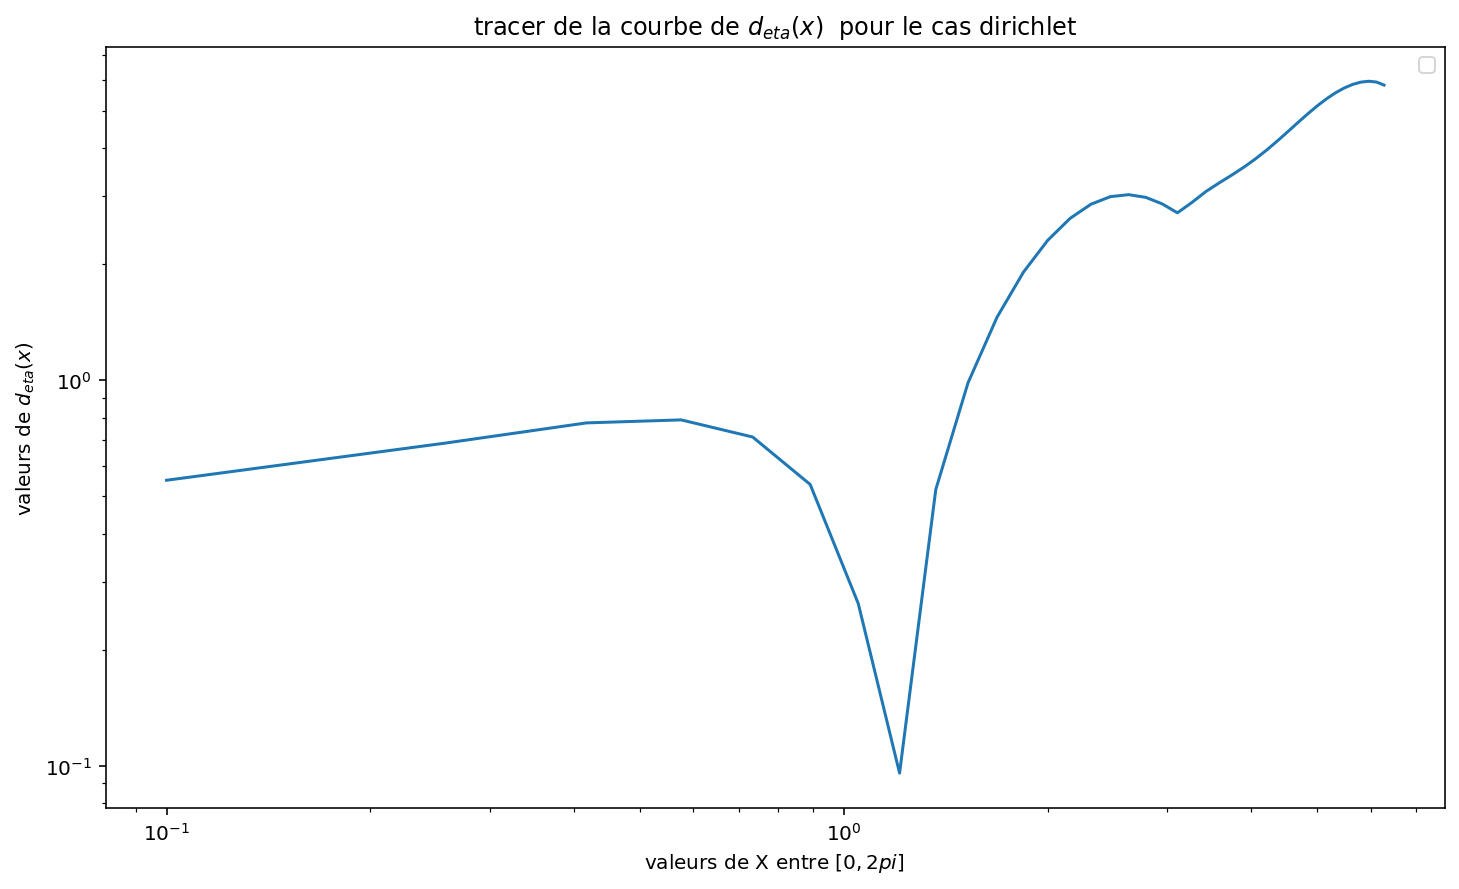

In [133]:
U, V = difference(1,2,0,0.1)
plt.loglog(X,abs(list(U)[0] - V))
plt.xlabel('valeurs de X entre $[0,2pi]$ ')
plt.ylabel('valeurs de $d_{eta}(x)$ ')
plt.legend(loc = 'upper right')
plt.title(r'tracer de la courbe de $d_{eta}(x)$  pour le cas dirichlet')
plt.show()

In [122]:
np.linalg.norm(list(U)[0] - V, np.infty)

5.969521624575377

On obtient donc la valeur de $max|d_{eta}(x)|$ pour x dans $[0,2pi]$

In [120]:
V

array([ 0.65046708,  0.94600532,  1.19231933,  1.36487564,  1.44648723,
        1.42902541,  1.3142294 ,  1.11353317,  0.84692653,  0.54096413,
        0.22612054, -0.06624506, -0.30701238, -0.47220041, -0.54535605,
       -0.51919282, -0.39631664, -0.18896627,  0.08220572,  0.39018994,
        0.37391724,  0.33757559,  0.3327113 ,  0.33417047,  0.32628749,
        0.30046594,  0.25362941,  0.1870797 ,  0.10550481,  0.0160145 ,
       -0.07282824, -0.15194987, -0.21261251, -0.24706448, -0.24887401,
       -0.21280063, -0.13401972, -0.0064447 ,  0.18023913,  0.44544999])

In [140]:
def pente(test,m,c,eta):
    x=np.log(X)  
    y=np.log(difference_u_et_ueta(test,m,c,eta))
    return stats.linregress(x,y)[0]

pente(1,2,0,0.01)

1.0778788811872724

In [4]:
ue_pen_neu(1,0.01,2)

-0.4161468365471424

In [73]:
def A1(n):
    h=np.pi/(n+1)
    A=np.zeros((n,n))
    for i in range(n):
        A[i,i]=2
    for i in range(n-1):
        A[i,i+1]=-1
        A[i+1,i]=-1
    return A/(h**2)

def A2(n):
    h=2*np.pi/(n+1)
    A=np.zeros((n,n))
    for i in range(n):
        A[i,i]=2
    for i in range(n-1):
        A[i,i+1]=-1
        A[i+1,i]=-1
    return A/(h**2)

def A3(n):
    h=np.pi/(n+1)
    A3=np.zeros((n,n))
    for i in range(1,n-1):
        A3[i,i]=2
    for i in range(n-1):
        A3[i,i+1]=-1
        A3[i+1,i]=-1
    A3[0,0]=-1
    A3[n-1,n-1]=-1
    return (A3)/(h**2)

def norm_npen_dir(N,test,m,c):
    h=np.pi/(N+1)
    X=np.linspace(0,np.pi,N)
    print(X)
    A=A1(N)
    b=f(X,test,m)
    Ubar=ue_npen(X,1,m,c)
    U=np.linalg.solve(A,b)
    e=np.linalg.norm(Ubar-U,np.infty)
    return X,A,U,Ubar,e

norm_npen_dir(50,1,0.01,2)


def norm_npen_neu(N,m,test,c):
    h=np.pi/(N+1)
    X=np.linspace(0,np.pi,N)
    print(X)
    A=A3(N)
    b=f(X,test,m)
    Ubar=ue_npen(X,2,m,c)
    U=np.linalg.solve(A,b)
    e=np.linalg.norm(Ubar-U,np.infty)
    return X,A,U,Ubar,e

ue_npen(X,2,2,0)

[0.         0.06411414 0.12822827 0.19234241 0.25645654 0.32057068
 0.38468481 0.44879895 0.51291309 0.57702722 0.64114136 0.70525549
 0.76936963 0.83348377 0.8975979  0.96171204 1.02582617 1.08994031
 1.15405444 1.21816858 1.28228272 1.34639685 1.41051099 1.47462512
 1.53873926 1.60285339 1.66696753 1.73108167 1.7951958  1.85930994
 1.92342407 1.98753821 2.05165235 2.11576648 2.17988062 2.24399475
 2.30810889 2.37222302 2.43633716 2.5004513  2.56456543 2.62867957
 2.6927937  2.75690784 2.82102197 2.88513611 2.94925025 3.01336438
 3.07747852 3.14159265]


array([ 0.98006658,  0.86934393,  0.67203258,  0.40778519,  0.10292144,
       -0.21219353, -0.50617352, -0.74973744, -0.91862574, -0.99601675,
       -0.97420214, -0.85535469, -0.65131191, -0.38239692, -0.07539429,
        0.23911778,  0.52981316,  0.7677379 ,  0.92919413,  0.99810043,
        0.96759358,  0.84071212,  0.63009375,  0.35671656,  0.04780956,
       -0.26585939, -0.55304812, -0.78515195, -0.93905279, -0.99942176,
       -0.96024596, -0.8254274 , -0.60839432, -0.33076374, -0.0201883 ,
        0.29239794,  0.57586065,  0.80196629,  0.94819419,  0.99997971])

[0.         0.06411414 0.12822827 0.19234241 0.25645654 0.32057068
 0.38468481 0.44879895 0.51291309 0.57702722 0.64114136 0.70525549
 0.76936963 0.83348377 0.8975979  0.96171204 1.02582617 1.08994031
 1.15405444 1.21816858 1.28228272 1.34639685 1.41051099 1.47462512
 1.53873926 1.60285339 1.66696753 1.73108167 1.7951958  1.85930994
 1.92342407 1.98753821 2.05165235 2.11576648 2.17988062 2.24399475
 2.30810889 2.37222302 2.43633716 2.5004513  2.56456543 2.62867957
 2.6927937  2.75690784 2.82102197 2.88513611 2.94925025 3.01336438
 3.07747852 3.14159265]


No handles with labels found to put in legend.


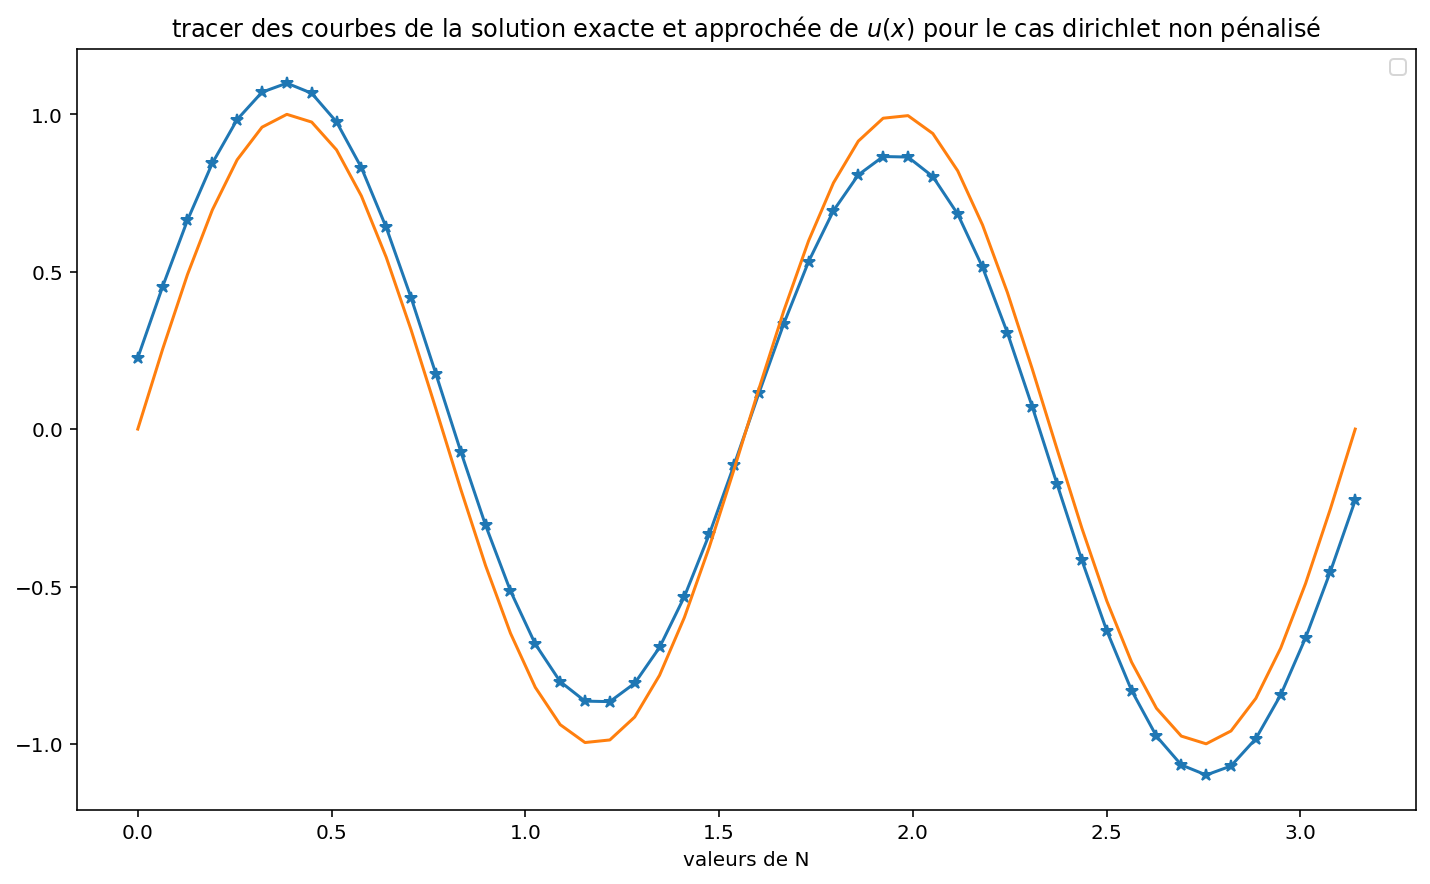

In [110]:
def trace_npen_dir(N,test,m,c) :
    X,A,U,Ubar,e=norm_npen_dir(N,test,m,c)
    plt.plot(X,U,'-*')
    plt.plot(X,Ubar)
    plt.xlabel('valeurs de N')
    plt.legend(loc = 'upper right')
    plt.title(r'tracer des courbes de la solution exacte et approchée de $u(x)$ pour le cas dirichlet non pénalisé')
    plt.show()
trace_npen_dir(50,1,4,0)


In [111]:
def erreurs_npen_dir(test,m,c,N):

    X,A,U,Ubar,e=norm_npen_dir(N,test,m,c)
    return e

erreurs_npen_dir(1,2,2,20)

[0.         0.16534698 0.33069396 0.49604095 0.66138793 0.82673491
 0.99208189 1.15742887 1.32277585 1.48812284 1.65346982 1.8188168
 1.98416378 2.14951076 2.31485774 2.48020473 2.64555171 2.81089869
 2.97624567 3.14159265]


0.2426866721574766

In [112]:
def erreurs_npen_neu(test,m,c,N):

    X,A,U,Ubar,e=norm_npen_neu(N,test,m,c)
    return e


In [113]:
erreurs_npen_neu(2,2,0,20)

[0.         0.16534698 0.33069396 0.49604095 0.66138793 0.82673491
 0.99208189 1.15742887 1.32277585 1.48812284 1.65346982 1.8188168
 1.98416378 2.14951076 2.31485774 2.48020473 2.64555171 2.81089869
 2.97624567 3.14159265]


1.0223800553312685

[0.         0.16534698 0.33069396 0.49604095 0.66138793 0.82673491
 0.99208189 1.15742887 1.32277585 1.48812284 1.65346982 1.8188168
 1.98416378 2.14951076 2.31485774 2.48020473 2.64555171 2.81089869
 2.97624567 3.14159265]
[0.         0.10833078 0.21666156 0.32499234 0.43332312 0.54165391
 0.64998469 0.75831547 0.86664625 0.97497703 1.08330781 1.19163859
 1.29996937 1.40830016 1.51663094 1.62496172 1.7332925  1.84162328
 1.94995406 2.05828484 2.16661562 2.2749464  2.38327719 2.49160797
 2.59993875 2.70826953 2.81660031 2.92493109 3.03326187 3.14159265]
[0.         0.08055366 0.16110732 0.24166097 0.32221463 0.40276829
 0.48332195 0.5638756  0.64442926 0.72498292 0.80553658 0.88609024
 0.96664389 1.04719755 1.12775121 1.20830487 1.28885852 1.36941218
 1.44996584 1.5305195  1.61107316 1.69162681 1.77218047 1.85273413
 1.93328779 2.01384144 2.0943951  2.17494876 2.25550242 2.33605608
 2.41660973 2.49716339 2.57771705 2.65827071 2.73882436 2.81937802
 2.89993168 2.98048534 3.061039   3.14

[0.         0.05324733 0.10649467 0.159742   0.21298933 0.26623667
 0.319484   0.37273133 0.42597866 0.479226   0.53247333 0.58572066
 0.638968   0.69221533 0.74546266 0.79871    0.85195733 0.90520466
 0.958452   1.01169933 1.06494666 1.118194   1.17144133 1.22468866
 1.27793599 1.33118333 1.38443066 1.43767799 1.49092533 1.54417266
 1.59741999 1.65066733 1.70391466 1.75716199 1.81040933 1.86365666
 1.91690399 1.97015133 2.02339866 2.07664599 2.12989332 2.18314066
 2.23638799 2.28963532 2.34288266 2.39612999 2.44937732 2.50262466
 2.55587199 2.60911932 2.66236666 2.71561399 2.76886132 2.82210865
 2.87535599 2.92860332 2.98185065 3.03509799 3.08834532 3.14159265]
[0.         0.04553033 0.09106066 0.13659098 0.18212131 0.22765164
 0.27318197 0.3187123  0.36424263 0.40977295 0.45530328 0.50083361
 0.54636394 0.59189427 0.6374246  0.68295492 0.72848525 0.77401558
 0.81954591 0.86507624 0.91060657 0.95613689 1.00166722 1.04719755
 1.09272788 1.13825821 1.18378854 1.22931886 1.27484919 1.320

No handles with labels found to put in legend.


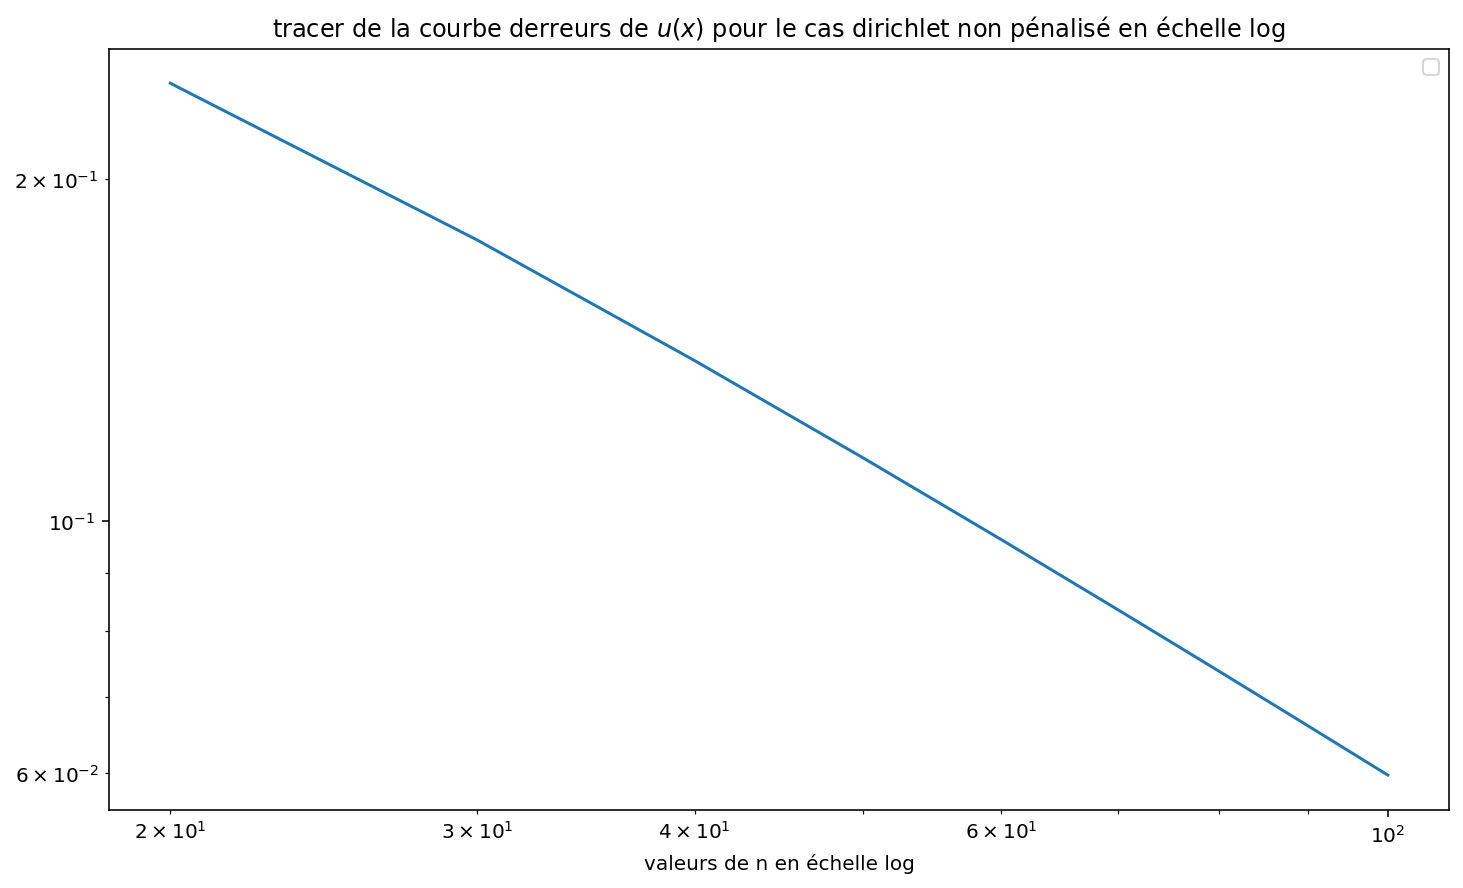

In [114]:
def tracer_erreurs_npen_dir(lst_n):
    l=[]
    for n in lst_n :
        l.append(erreurs_npen_dir(1,2,0,n))
       
            
    
    plt.xlabel('valeurs de n en échelle log')
    plt.legend(loc = 'upper right')
    plt.title(r'tracer de la courbe derreurs de $u(x)$ pour le cas dirichlet non pénalisé en échelle log')
    plt.loglog(lst_n,l)
    plt.show()
    
tracer_erreurs_npen_dir([20,30,40,50,60,70,80,90,100])

[0.         0.16534698 0.33069396 0.49604095 0.66138793 0.82673491
 0.99208189 1.15742887 1.32277585 1.48812284 1.65346982 1.8188168
 1.98416378 2.14951076 2.31485774 2.48020473 2.64555171 2.81089869
 2.97624567 3.14159265]
[0.         0.10833078 0.21666156 0.32499234 0.43332312 0.54165391
 0.64998469 0.75831547 0.86664625 0.97497703 1.08330781 1.19163859
 1.29996937 1.40830016 1.51663094 1.62496172 1.7332925  1.84162328
 1.94995406 2.05828484 2.16661562 2.2749464  2.38327719 2.49160797
 2.59993875 2.70826953 2.81660031 2.92493109 3.03326187 3.14159265]
[0.         0.08055366 0.16110732 0.24166097 0.32221463 0.40276829
 0.48332195 0.5638756  0.64442926 0.72498292 0.80553658 0.88609024
 0.96664389 1.04719755 1.12775121 1.20830487 1.28885852 1.36941218
 1.44996584 1.5305195  1.61107316 1.69162681 1.77218047 1.85273413
 1.93328779 2.01384144 2.0943951  2.17494876 2.25550242 2.33605608
 2.41660973 2.49716339 2.57771705 2.65827071 2.73882436 2.81937802
 2.89993168 2.98048534 3.061039   3.14

No handles with labels found to put in legend.


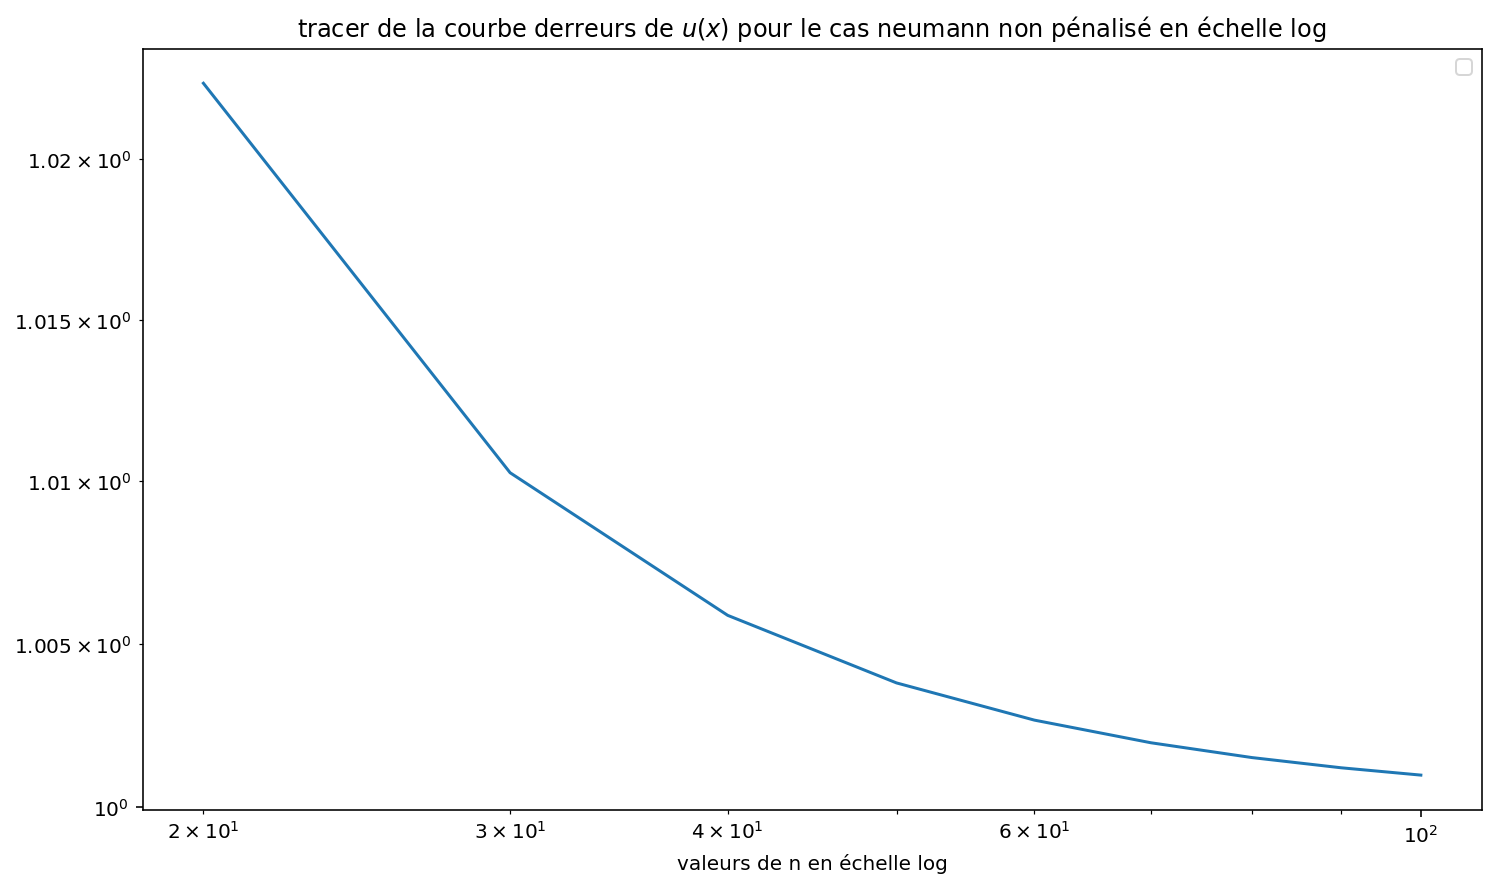

In [115]:
def tracer_erreurs_npen_neu(lst_n):
    l=[]
    for n in lst_n :
        l.append(erreurs_npen_neu(2,2,0,n))
       
            
    
    plt.xlabel('valeurs de n en échelle log')
    plt.legend(loc = 'upper right')
    plt.title(r'tracer de la courbe derreurs de $u(x)$ pour le cas neumann non pénalisé en échelle log')
    plt.loglog(lst_n,l)
    plt.show()
    
tracer_erreurs_npen_neu([20,30,40,50,60,70,80,90,100])

In [116]:
def qui(x):
    result = []
    for i in x:
        if 0<i and i<np.pi :
            result.append(0)
        else :
            result.append(1)
    return result

In [117]:
def Q(x):
    if 0 < x and x < np.pi:
        return 0
    else: return 1

In [118]:
ue_pen_dir(0,0.01,2)

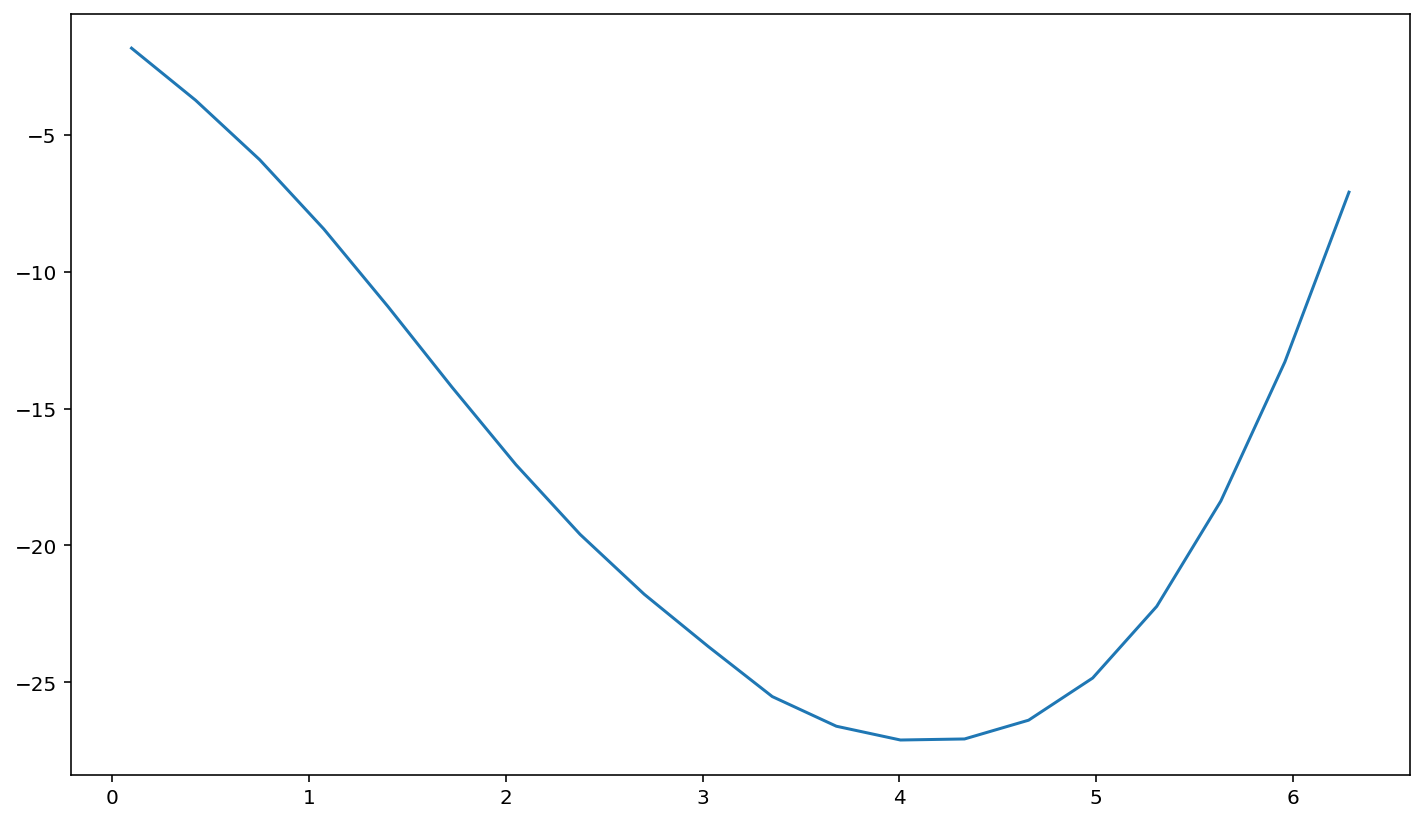

In [133]:
def norm_pen_dir(N,test,m,c,eta):
    h=2*np.pi/(N+1)
    Y=np.linspace(0.1,2*np.pi,N)
    A=A2(N)
    b=[]
    for i in range(len(Y)):
        b.append((f(Y[i], test, m) - (1/eta)*Q(Y[i])))
    
    U_p=np.linalg.solve(A,b)
    
    return Y,A,U_p

Y,A,U_p = norm_pen_dir(20,1,2,0,0.1)
plt.plot(Y,U_p)

In [0]:
e_p

In [120]:
def trace_pen_dir(N,test,m,c,eta):
    Y,A,U_p,Ubar_p,e_p=norm_pen_dir(N,test,m,c,eta)
    plt.plot(Y,U_p,'-*')
    plt.plot(Y,Ubar_p)
    
trace_pen_dir(50,1,2,1,1)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [0]:
def tracer_sol_exac_pen_dir(lst_eta):
    l=[]
    for eta in lst_eta :
        l.append(ue_pen_dir(1,eta,2))
                 
    plt.plot(l,lst_eta)

tracer_sol_exac_pen_dir([0.00001,0.0001,0.001,0.01,0.1])

In [0]:
l_eta=[0.0001,0.0001,0.001,0.1]
for eta in l_eta :
    print(ue_pen_dir(1,eta,2))

In [0]:
def conv_dir(eta,m):
    k=((1/np.pi)*np.exp(-np.pi/np.sqrt(eta)))-((1/np.pi)*np.exp(-2*np.pi/np.sqrt(eta)))+((1/np.sqrt(eta))*np.exp(-2*np.pi/np.sqrt(eta)))
    k_p=((1/np.pi)*np.exp(np.pi/np.sqrt(eta)))-((1/np.pi)*np.exp(2*np.pi/np.sqrt(eta)))-((1/np.sqrt(eta))*np.exp(2*np.pi/np.sqrt(eta)))
    k1=((1/np.pi)*np.exp(-np.pi/np.sqrt(eta)))-((1/np.pi)*np.exp(-2*np.pi/np.sqrt(eta)))+((1/np.sqrt(eta))*np.exp(-np.pi/np.sqrt(eta)))
    k1_p=((1/np.pi)*np.exp(np.pi/np.sqrt(eta)))-((1/np.pi)*np.exp(2*np.pi/np.sqrt(eta)))-((1/np.sqrt(eta))*np.exp(np.pi/np.sqrt(eta)))
    B2_d=(-k*m*((-1)**m)-k1*m)/((1+eta*m**2)*(k_p*k1-k*k1_p))
    B1_d=(1/k)*(-m/(1+eta*m**2)-B2_d*k_p)
    A1_d=B1_d*((1/np.pi*np.exp(-np.pi/np.sqrt(eta)))-(1/np.pi*np.exp(-2*np.pi/np.sqrt(eta))))+B2_d*((1/np.pi*np.exp(np.pi/np.sqrt(eta)))-(1/np.pi*np.exp(2*np.pi/np.sqrt(eta))))
    A2_d=B1_d*np.exp(-2*np.pi/np.sqrt(eta))+B2_d*np.exp(2*np.pi/np.sqrt(eta))
    return np.sin((m**2*eta)/(1+eta*m**2)-1)+B1_d*np.exp(-1/np.sqrt(eta))+B2_d*np.exp(1/np.sqrt(eta))


conv_dir(0.0001,2)

In [0]:
l=[0.0000001,0.000001,0.00001,0.0001,0.001,0.01,0.1]
l_eta=[]
for eta in l :
    l_eta.append(conv_dir(eta,1))
    
plt.loglog(l,l_eta)
plt.loglog(l,ue_npen(l,1,2,0))
plt.xlabel('valeurs de eta')
plt.legend(loc = 'upper right')
plt.title(r'tracer de la courbe de convergence de u_eta vers u qaund eta tend vers 0 pour le cas dirichlet')


In [0]:
def conv_neu(eta,m,x,c):
    B1_n=(1-(-1)**m)/((1+eta)*np.pi)
    A1_n=eta*B1_n
    B2_n=(3*np.pi/2)*((((-1)**m)-1)/(1+eta))*((eta/2)+2)+1
    A2_n=2*np.pi*B1_n+B2_n-1
    return B1_n*x+B2_n-np.cos(m*x)-c

ValueError: x and y must have same first dimension, but have shapes (20,) and (1,)

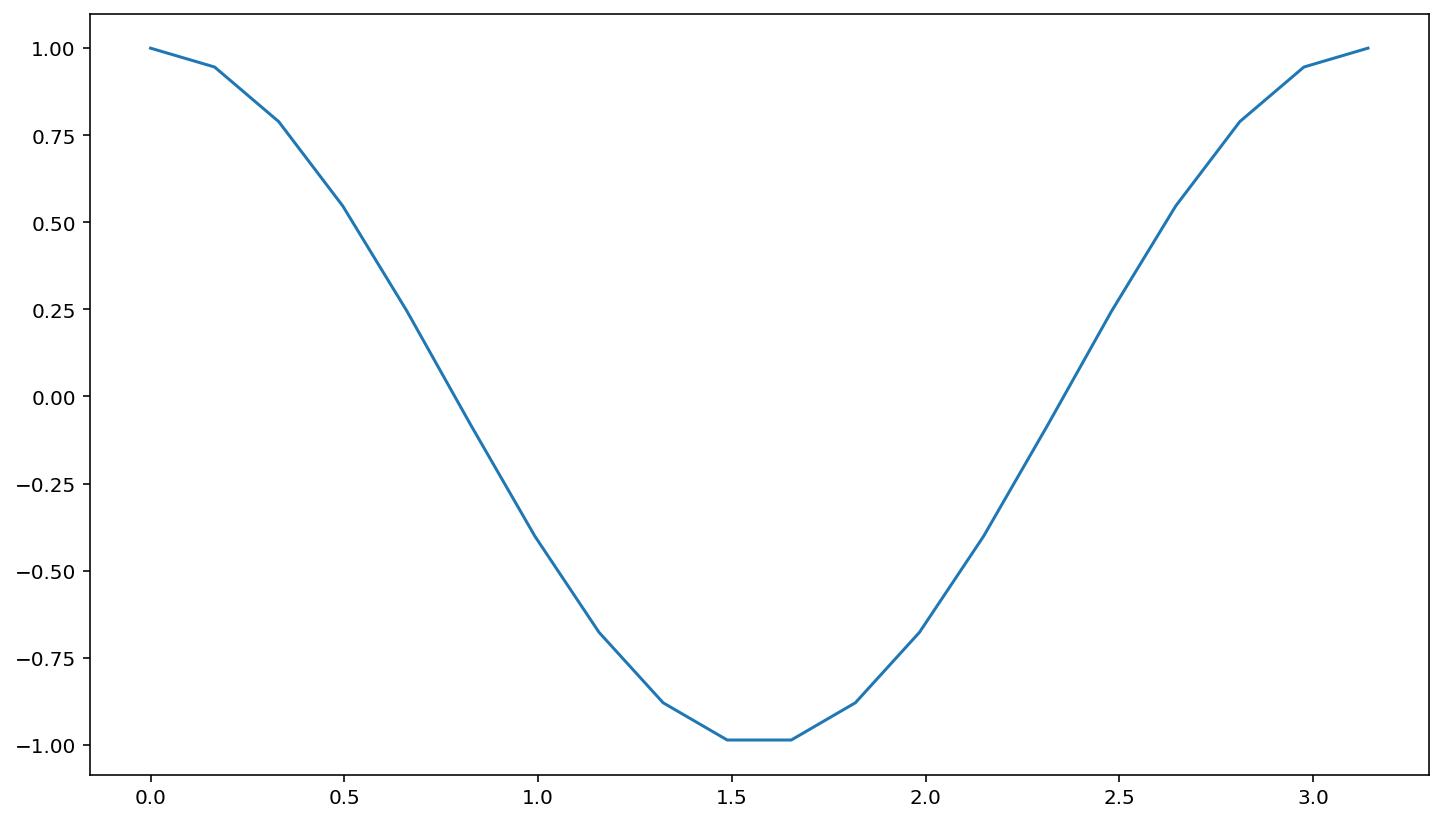

In [126]:
l=np.linspace(0,np.pi,20)



plt.plot(l,ue_npen(l,2,2,0))
plt.plot(l,conv_neu(0.1,1,1,0))
plt.xlabel('valeurs de eta')
plt.legend(loc = 'upper right')
plt.title(r'tracer de la courbe de convergence de u_eta vers u qaund eta tend vers 0 pour le cas NEUMANN')